# Aula 01

In [1]:
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
dataframe = pd.read_csv(path, encoding='utf8')
dataframe.drop(columns=['CUST_ID','TENURE'], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [3]:
dataframe.shape

(8950, 16)

In [4]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [5]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [6]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 03

## Calculando o Silhouette

In [8]:
from sklearn import metrics

In [9]:
labels = kmeans.labels_

In [10]:
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36450417328686124


# Aula 04

## Índice Davies-Bouldin

In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0757705558830923


# Aula 05

## Índice Calinski-Harabasz

In [12]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.8008235317793


# Aula 06

In [13]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [14]:
sl, dbsl, calinskil = clustering_algorithm(3, values)
print(sl, dbsl, calinskil)

0.32724464582661594 1.3093507662143316 3526.4668344515403


In [15]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.364439277430815 1.0758787031571042 3431.782548172111


In [16]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3071599254220744 1.141524556080041 3018.1027460690625


In [17]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2691530482111942 1.23881545762311 2403.359763613791


In [18]:
s5, dbs5, calinski5 = clustering_algorithm(50, values)
print(s5, dbs5, calinski5)

0.2396248981514429 1.2325067345270029 1611.114646673352


In [19]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [20]:
import numpy as np

In [21]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print("\n")
print(s2, dbs2, calinski2)

0.04017822379346311 3.466044849117046 303.93126275266224


0.364439277430815 1.0758787031571042 3431.782548172111


In [22]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689709458416189 1.0581656052369075 1204.0560966145404
0.3532183246410258 1.1429408609552176 1194.9401425417566
0.3617082519102253 1.1530065355003551 1159.0102864676858


# Aula 07

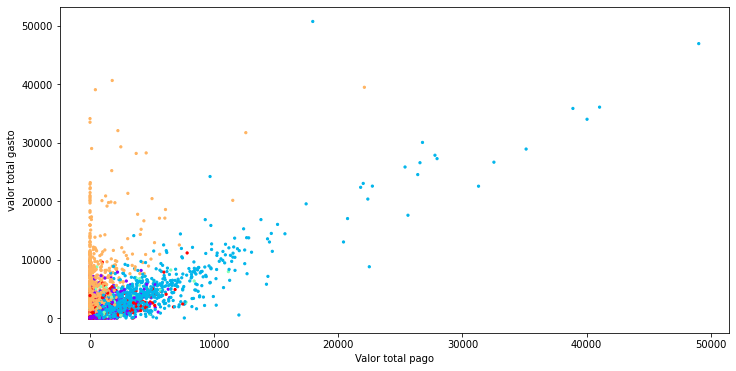

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("valor total gasto")
plt.show()

In [27]:
import seaborn as sns

In [28]:
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Error in callback <function flush_figures at 0x7fc6d9419290> (for post_execute):


KeyboardInterrupt: ignored

# Aula 08

In [29]:
dataframe.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        3280.0   443.746756   846.398201  ...         0.000000  0.444444  1.0
1        1538.0  1143.654411  1664.643671  ...         0.083333  0.545455  1.0
2         411.0  1987.501586  1854.459156  ...         0.000000  0.000000  1.0
3        1073.0  1794.764536  1982.173844  ...         0.083333  0.142857  1.0
4        2648.0  3038.132314  2479.290949  ...         0.000000  0.000000  0.6

[5 rows x 128 columns]

In [31]:
centroids = kmeans.cluster_centers_
centroids

array([[6.91011876e-02, 2.30698617e-04, 1.21431709e-01, 4.79816606e-02,
        7.35503074e-02, 2.43384856e-02, 1.72769885e-04, 3.36789398e-05,
        1.40239766e-04, 7.92583409e-06, 1.24000113e-04, 2.86240957e-03,
        9.43606691e-01, 1.53769633e-01, 5.68320400e-02, 7.61141861e-05],
       [1.59955939e-01, 2.45367523e-04, 4.38385271e-01, 2.56825320e-01,
        1.81731461e-01, 2.58391892e-02, 2.04488766e-04, 8.89645771e-05,
        1.50720581e-04, 9.38121195e-06, 1.69681064e-04, 6.17358546e-03,
        6.03934507e-01, 4.02618743e-01, 8.54465722e-02, 7.19841675e-05],
       [3.32918803e-01, 2.68423552e-04, 1.58240376e-01, 3.63059801e-02,
        1.22319068e-01, 5.83557153e-02, 1.66754597e-04, 2.64938445e-05,
        1.47063187e-04, 1.93217566e-05, 4.27934836e-04, 3.86197017e-03,
        3.76718873e-01, 2.51861450e-01, 6.80311114e-01, 4.23993819e-06],
       [2.35317569e-01, 2.16489198e-04, 6.04496610e-02, 3.43849416e-02,
        2.60699292e-02, 4.00329698e-01, 5.27098698e-05, 2.046

In [43]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224

PURCHASES 0.0196

CASH_ADVANCE 0.0226

CREDIT_LIMIT 0.0360

PAYMENTS 0.0280

MINIMUM_PAYMENTS 0.0543

In [47]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  ...     PAYMENTS  n_clients
cluster                            ...                        
0         443.746756   629.249107  ...   814.294226       3280
1        1143.654411  3272.524233  ...  3040.522067       1538
2        1987.501586   854.865815  ...  1336.238911        411
3        1794.764536   475.785508  ...  4706.788521       1073
4        3038.132314   385.096760  ...   968.599396       2648

[5 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


# Aula 09

CLUSTER 0: Clientes com os menores valores em gastos. Menor valor em saques.
CLUSTER 1: Clientes com os maiores valores em gastos. Menor valor em compras
CLUSTER 2: Maior valor em compras com grande diferença.
CLUSTER 3: Maior valor em saques. 
CLUSTER 4:

In [48]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,1538.0,0.278077,0.366978,0.0,0.0,0.083333,0.545455,1.0
2,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
3,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
4,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
